In [69]:
import pickle
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [52]:
with open('misc/stat_label_class_counts.pickle', 'br') as f:
    labels = pickle.load(f)

with open('misc/stat_rgb_value_counts.pickle', 'br') as f:
    images = pickle.load(f)

elevation_counts = np.load('misc/stat_elevation_histogram.npy')

In [40]:
means = []
stds = []

total = sum(images[0].values())

for i in range(3):
    numerator = 0
    for k, v in images[i].items():
        numerator += k * v
    means.append(numerator / total)

for i in range(3):
    numerator = 0
    for k, v in images[i].items():
        numerator += (k - means[i]) ** 2 * v
    stds.append(np.sqrt(numerator / total))
    
print('Means: '.rjust(21), means)
print('Standard deviations: ', stds)

              Means:  [108.73194593417789, 118.61634496065261, 95.22041676898088]
Standard deviations:  [56.70238801351345, 45.28426884756322, 42.17654179230018]


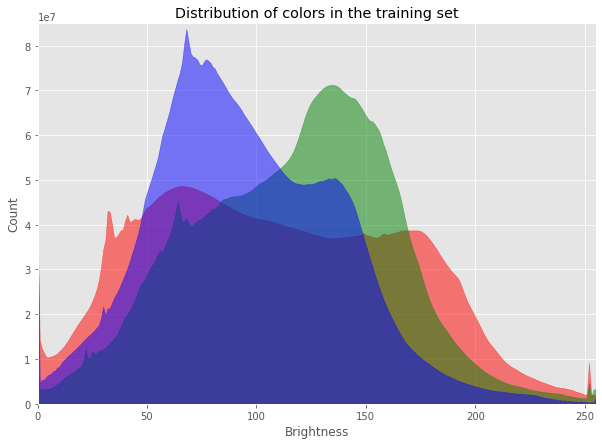

In [80]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.fill_between(range(256), 0, images[0].values(), color='r', alpha=0.5)
ax.fill_between(range(256), 0, images[1].values(), color='g', alpha=0.5)
ax.fill_between(range(256), 0, images[2].values(), color='b', alpha=0.5)
ax.set_xlim(0, 255)
ax.set_ylim(0, 8.5e7)
ax.set_title('Distribution of colors in the training set')
ax.set_xlabel('Brightness')
ax.set_ylabel('Count');

In [57]:
bins = np.arange(-500, 5000)
counts = elevation_counts[1:]
total = np.sum(elevation_counts[1:])

mean_elevation = np.sum(counts * bins) / total
elevation_var = np.sum((bins - mean_elevation) ** 2 * counts) / total
elevation_std = np.sqrt(elevation_var)

print('Elevation mean: ', mean_elevation)
print('Elevation standard deviation: ', elevation_std)

Elevation mean:  248.76421001918803
Elevation standard deviation:  502.38551105388285


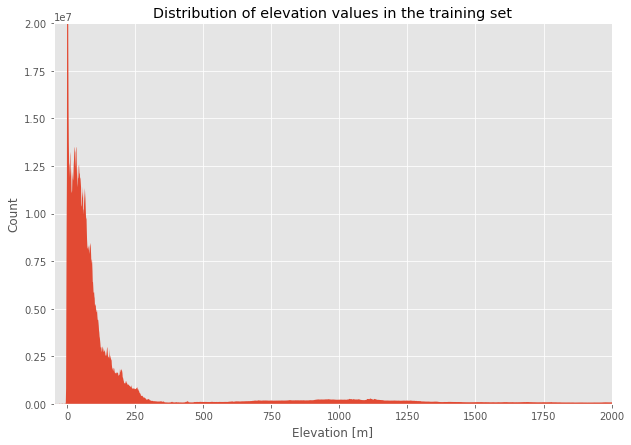

In [72]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.fill_between(bins, 0, counts)
ax.set_xlim(-50, 2000)
ax.set_ylim(0, 2e7)
ax.set_title('Distribution of elevation values in the training set')
ax.set_xlabel('Elevation [m]')
ax.set_ylabel('Count');